###Import Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

###Dataset

In [70]:
df = pd.read_csv('game.csv')

In [71]:
print(df.head())

  Game ID                   Name Platform  Year_of_Release         Genre  \
0  2002VC           Gran Turismo       PS             1997        Racing   
1  8385KK      Final Fantasy VII       PS             1997  Role-Playing   
2  9539QP         Tomb Raider II       PS             1997        Action   
3  1698CR              Half-Life       PC             1997       Shooter   
4  4757KF  Final Fantasy Tactics       PS             1997  Role-Playing   

                     Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0  Sony Computer Entertainment      4.02      3.87      2.54         0.52   
1  Sony Computer Entertainment      3.01      2.47      3.28         0.96   
2            Eidos Interactive      2.30      2.46      0.20         0.28   
3                Vivendi Games      4.03      0.00      0.09         0.00   
4                   SquareSoft      0.93      0.12      1.34         0.06   

   ...          Developer  Rating  Single Player/ Multi Player  Download Size  \

In [72]:
print(df.isnull().sum())

Game ID                          0
Name                             0
Platform                         0
Year_of_Release                  0
Genre                            0
Publisher                        0
NA_Sales                         0
EU_Sales                         0
JP_Sales                         0
Other_Sales                      0
Global_Sales                     0
Critic_Score                     0
Critic_Count                     0
User_Score                     982
User_Count                     982
Developer                        0
Rating                          49
Single Player/ Multi Player      0
Download Size                    0
Viewership (Thousands)           0
Online/Offline                   0
In game purchase                 0
Price                            0
Countries                        0
In game voice/chat               0
dtype: int64


In [73]:
df = df.dropna()

In [74]:
print(df.dtypes)

Game ID                         object
Name                            object
Platform                        object
Year_of_Release                  int64
Genre                           object
Publisher                       object
NA_Sales                       float64
EU_Sales                       float64
JP_Sales                       float64
Other_Sales                    float64
Global_Sales                   float64
Critic_Score                     int64
Critic_Count                     int64
User_Score                     float64
User_Count                     float64
Developer                       object
Rating                          object
Single Player/ Multi Player     object
Download Size                    int64
Viewership (Thousands)           int64
Online/Offline                  object
In game purchase                object
Price                            int64
Countries                        int64
In game voice/chat              object
dtype: object


In [75]:
print(df.describe())

       Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      6272.000000  6272.000000  6272.000000  6272.000000  6272.000000   
mean       2007.288584     0.409711     0.244695     0.060947     0.086135   
std           4.085392     0.999888     0.711371     0.286321     0.279466   
min        1997.000000     0.000000     0.000000     0.000000     0.000000   
25%        2004.000000     0.060000     0.020000     0.000000     0.010000   
50%        2007.000000     0.160000     0.060000     0.000000     0.020000   
75%        2010.000000     0.410000     0.212500     0.010000     0.070000   
max        2016.000000    41.360000    28.960000     6.500000    10.570000   

       Global_Sales  Critic_Score  Critic_Count   User_Score    User_Count  \
count   6272.000000   6272.000000   6272.000000  6272.000000   6272.000000   
mean       0.801556     70.342634     29.100128     7.183992    172.189413   
std        2.027894     13.814283     19.097594     1.445112   

### Distribution of sales by region

<Axes: >

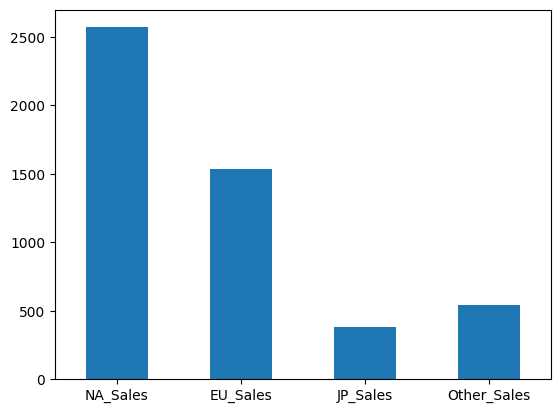

In [76]:
region_sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df[region_sales].sum().plot(kind='bar', rot=0)

### Box plot of download size by platform

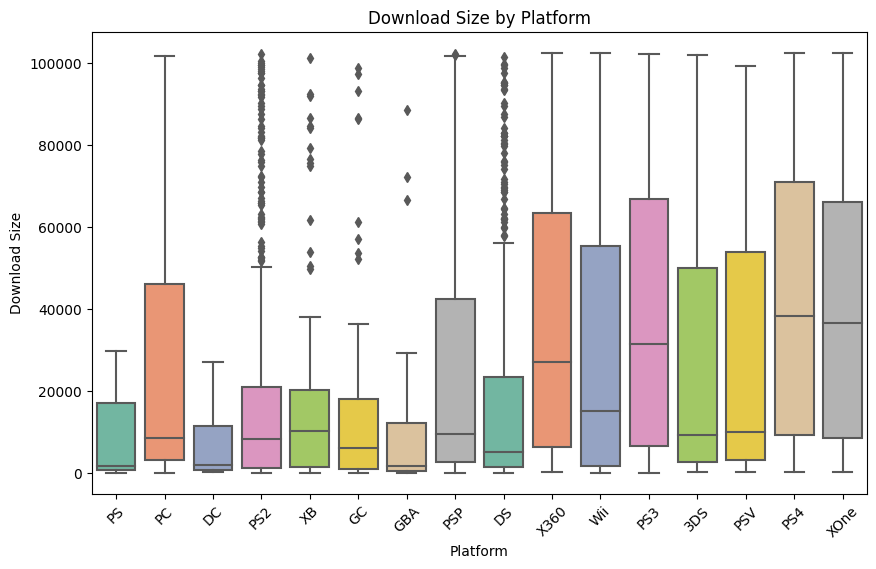

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Platform', y='Download Size', palette='Set2')
plt.xlabel('Platform')
plt.ylabel('Download Size')
plt.title('Download Size by Platform')
plt.xticks(rotation=45)
plt.show()

### Pairplot of sales, scores, and user counts

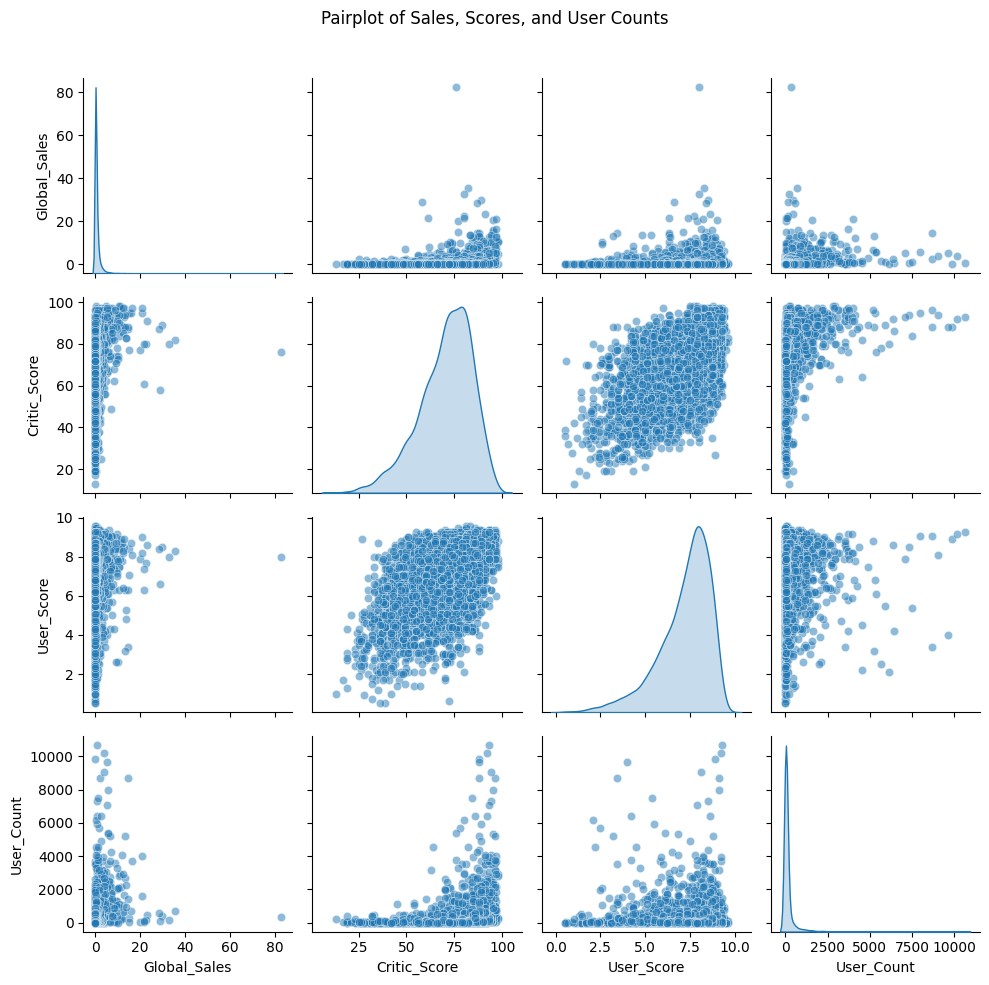

In [78]:
pairplot_cols = ['Global_Sales', 'Critic_Score', 'User_Score', 'User_Count']
sns.pairplot(df[pairplot_cols].dropna(), diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Sales, Scores, and User Counts')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Top publishers by sales

<Axes: xlabel='Publisher'>

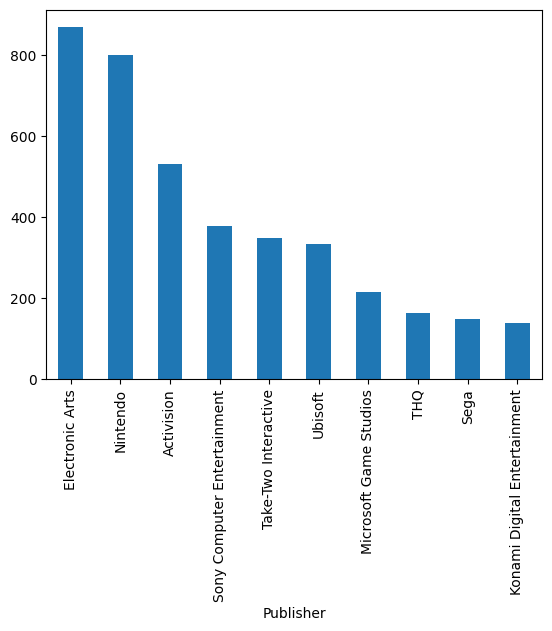

In [79]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)
top_publishers.plot(kind='bar')

### Genre distribution

<Axes: ylabel='Genre'>

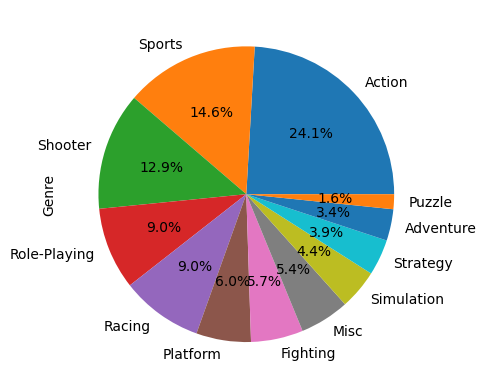

In [80]:
genre_counts = df['Genre'].value_counts()
genre_counts.plot(kind='pie', autopct='%1.1f%%')

# Scatter plot of user scores vs. critic scores

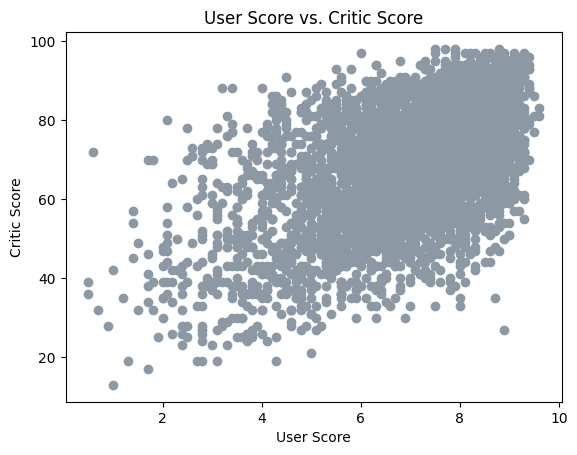

In [81]:
plt.scatter(df['User_Score'], df['Critic_Score'], color='#8C99A5')
plt.xlabel('User Score')
plt.ylabel('Critic Score')
plt.title('User Score vs. Critic Score')
plt.show()

### Bubble chart of sales by year

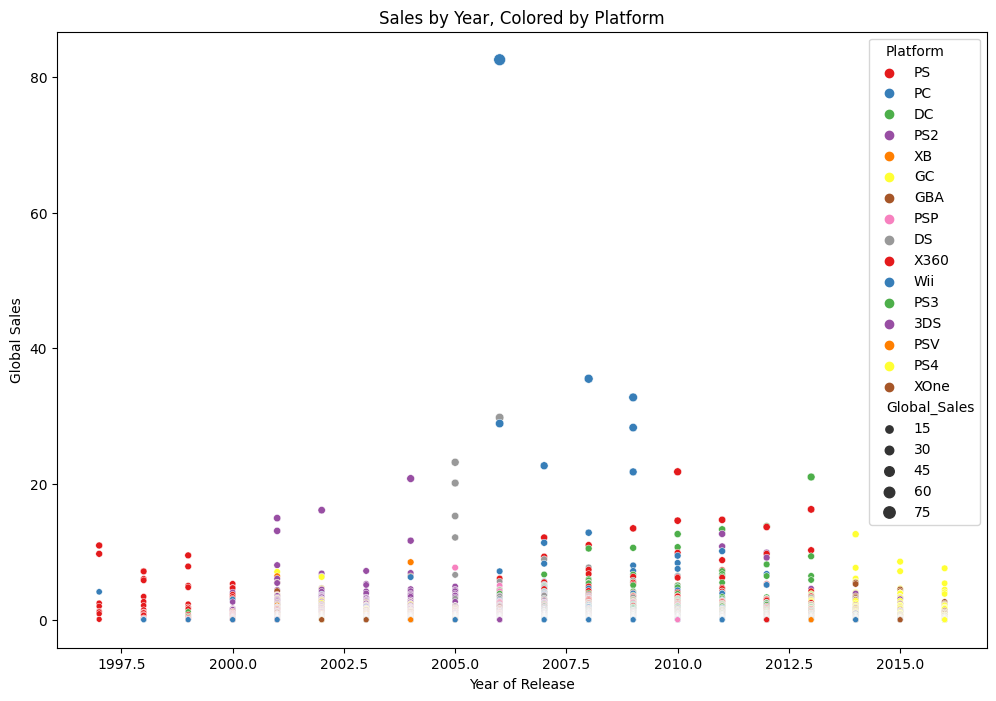

In [82]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Year_of_Release', y='Global_Sales', hue='Platform', size='Global_Sales', palette='Set1')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales')
plt.title('Sales by Year, Colored by Platform')
plt.show()

### Bar plot of average viewership by genre

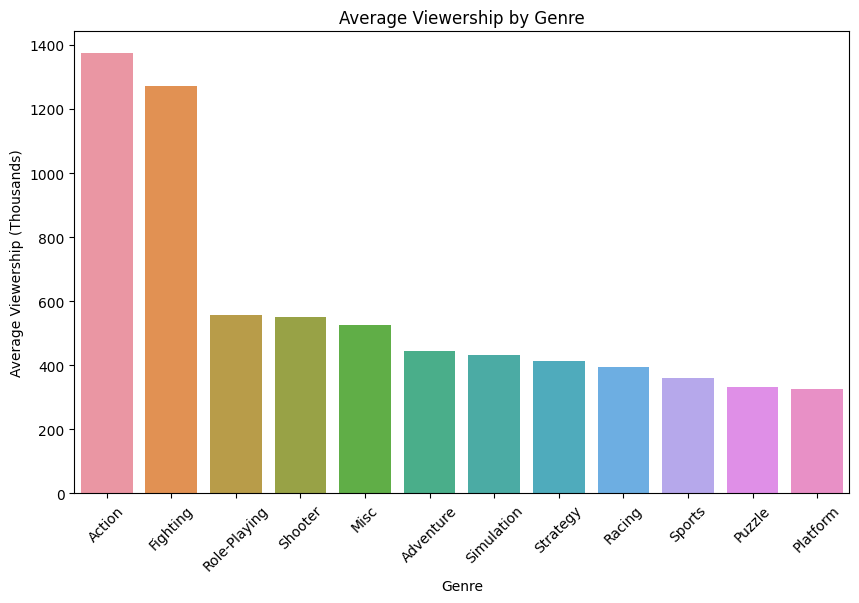

In [83]:
plt.figure(figsize=(10, 6))
genre_viewership = df.groupby('Genre')['Viewership (Thousands)'].mean().sort_values(ascending=False)
sns.barplot(x=genre_viewership.index, y=genre_viewership.values)
plt.xlabel('Genre')
plt.ylabel('Average Viewership (Thousands)')
plt.title('Average Viewership by Genre')
plt.xticks(rotation=45)
plt.show()


### Violin plot of critic scores by genre

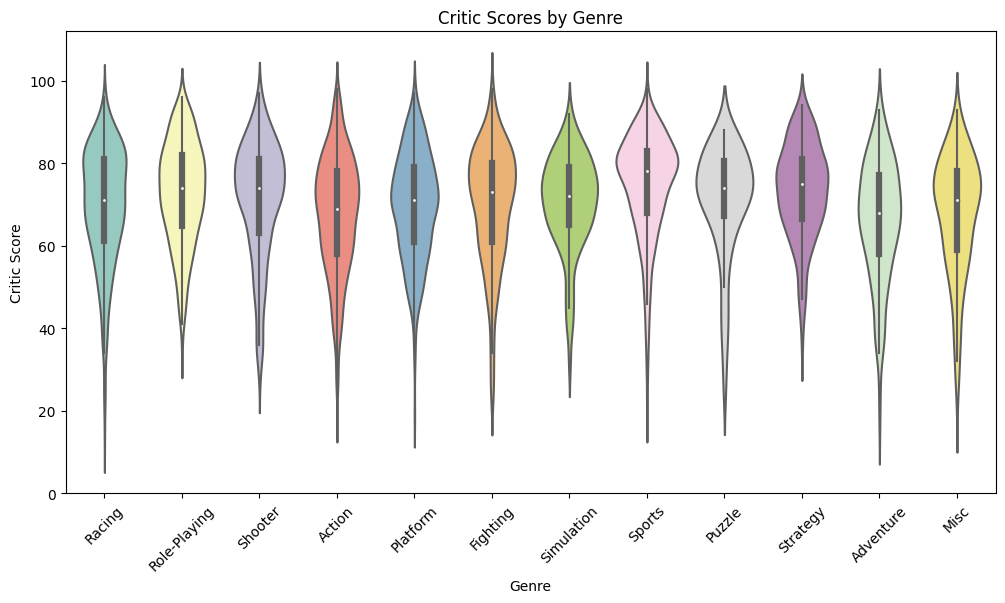

In [84]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Genre', y='Critic_Score', palette='Set3')
plt.xlabel('Genre')
plt.ylabel('Critic Score')
plt.title('Critic Scores by Genre')
plt.xticks(rotation=45)
plt.show()



#### Heatmap of sales by genre and platform

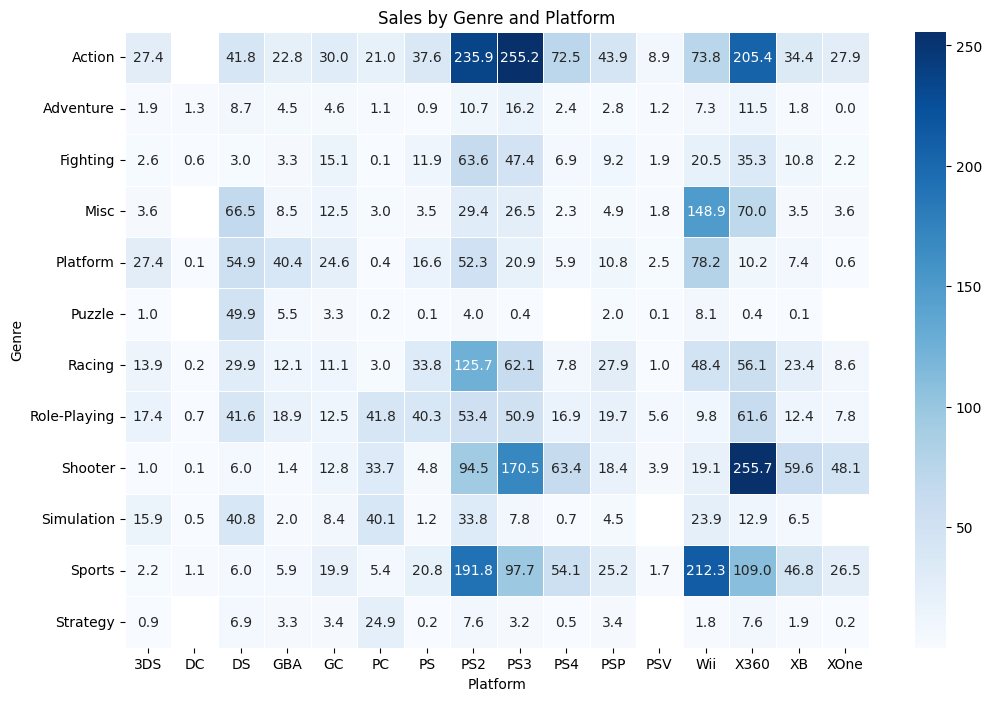

In [85]:
genre_platform_sales = df.pivot_table(index='Genre', columns='Platform', values='Global_Sales', aggfunc=np.sum)
plt.figure(figsize=(12, 8))
sns.heatmap(genre_platform_sales, cmap='Blues', annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.title('Sales by Genre and Platform')
plt.show()


### Histogram of game prices

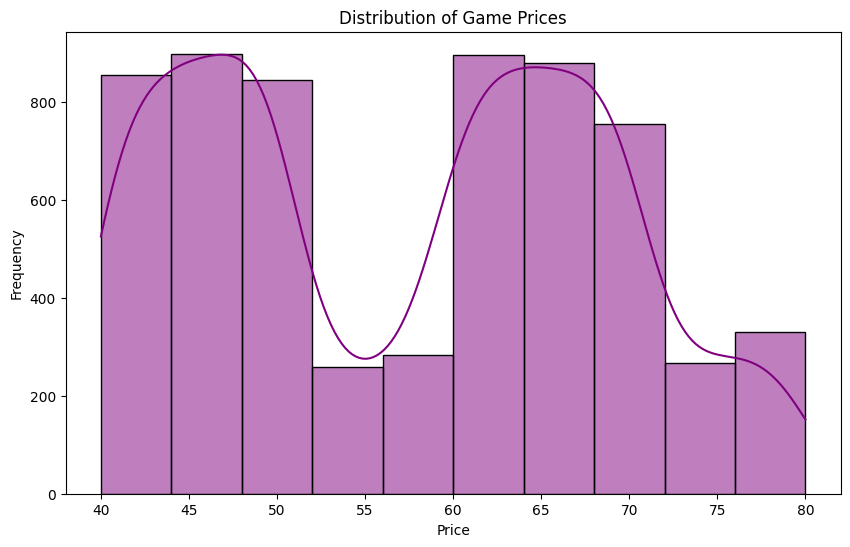

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=10, kde=True, color='purple')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Game Prices')
plt.show()


###Linear Regression

In [87]:
features = ['Critic_Score', 'User_Score', 'Global_Sales']
df_model = df[features]

In [88]:
X = df_model.drop('Global_Sales', axis=1)
y = df_model['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [90]:
y_pred = model.predict(X_test)


####Model Evaluation

In [91]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 4.031299434014548
R^2 Score: 0.047209571868872535


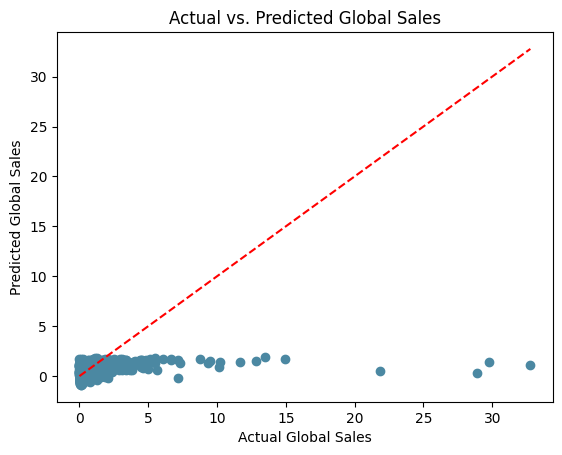

In [92]:
plt.scatter(y_test, y_pred, color='#4B88A2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs. Predicted Global Sales')
plt.show()

###Decision Tree Model

In [93]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)


DecisionTreeRegressor()

In [94]:
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

In [95]:
print("Decision Tree - Mean Squared Error:", tree_mse)
print("Decision Tree - R^2 Score:", tree_r2)

Decision Tree - Mean Squared Error: 4.827078784582473
Decision Tree - R^2 Score: -0.14087145771876664


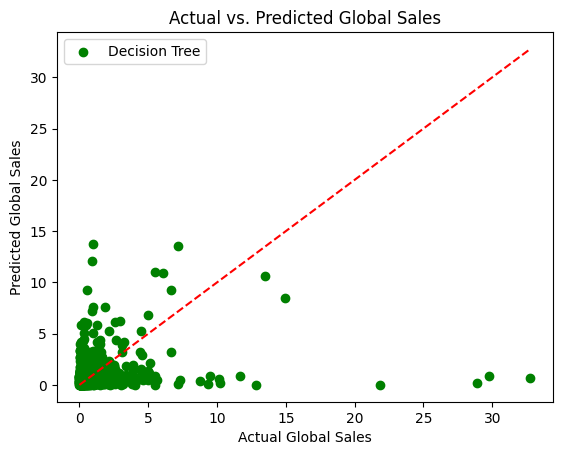

In [96]:
plt.scatter(y_test, tree_pred, color='green', label='Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs. Predicted Global Sales')
plt.legend()

plt.show()

###Random Forest

In [97]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

In [98]:
forest_mse = mean_squared_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)

In [99]:
print("Random Forest - Mean Squared Error:", forest_mse)
print("Random Forest - R^2 Score:", forest_r2)


Random Forest - Mean Squared Error: 4.515601522268554
Random Forest - R^2 Score: -0.06725436254366324


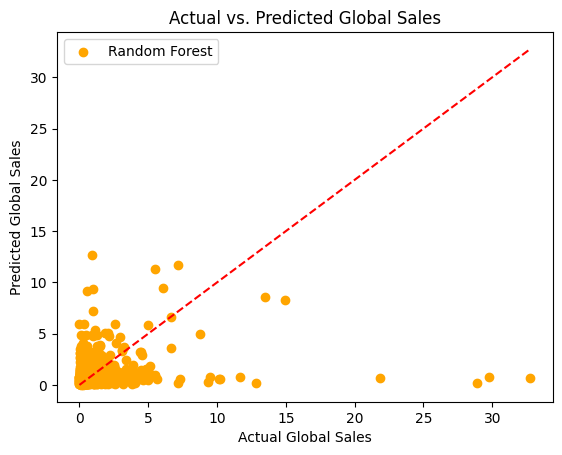

In [100]:
plt.scatter(y_test, forest_pred, color='orange', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs. Predicted Global Sales')
plt.legend()
plt.show()

####Comparison b/w models

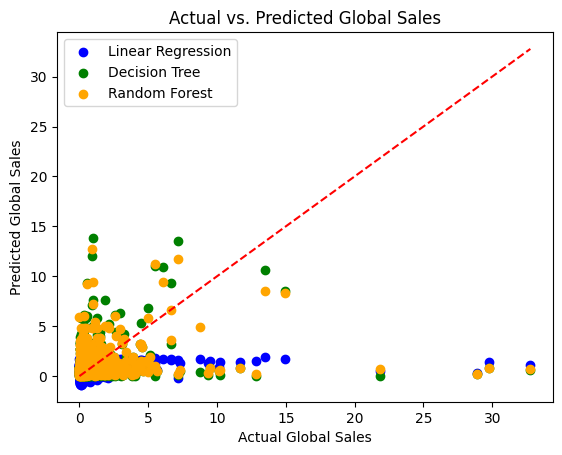

In [101]:
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, tree_pred, color='green', label='Decision Tree')
plt.scatter(y_test, forest_pred, color='orange', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs. Predicted Global Sales')
plt.legend()
plt.show()